<a href="https://colab.research.google.com/github/Manar-salem/PRODIGY_TrackCode_Task-02/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [87]:
customers = pd.read_csv('Mall_Customers.csv')

In [88]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [89]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [90]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [91]:
customers.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [92]:
X = customers.drop(['CustomerID','Gender','Age'],axis=1)
# X=customers.iloc[:,3:4]

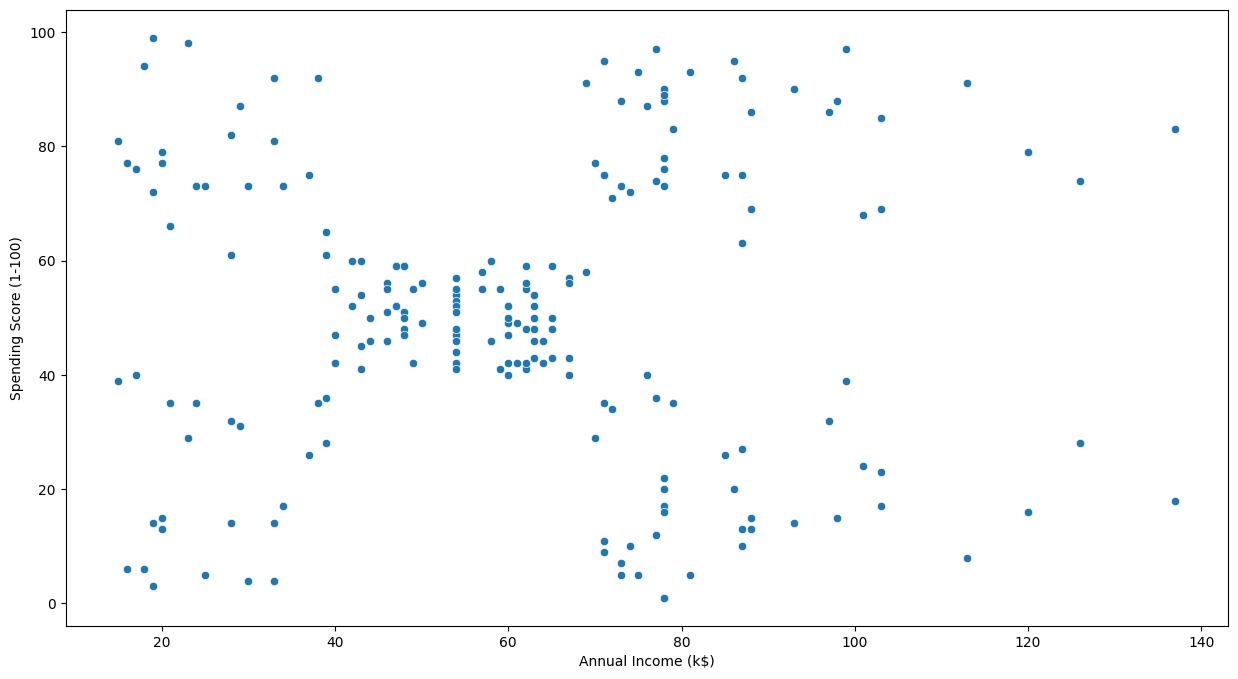

In [93]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=customers)
plt.show()


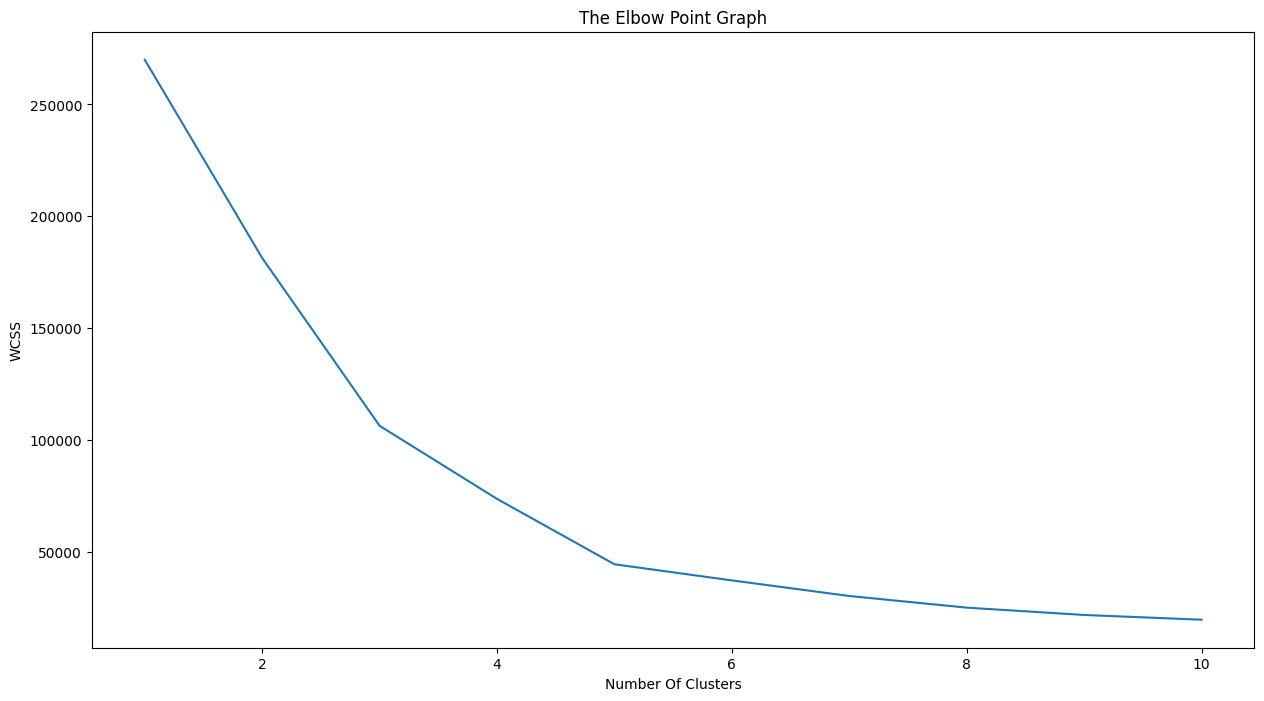

In [94]:

WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10 , random_state=2)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)


plt.figure(figsize=(15, 8))
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Point Graph')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [95]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

Y = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [96]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

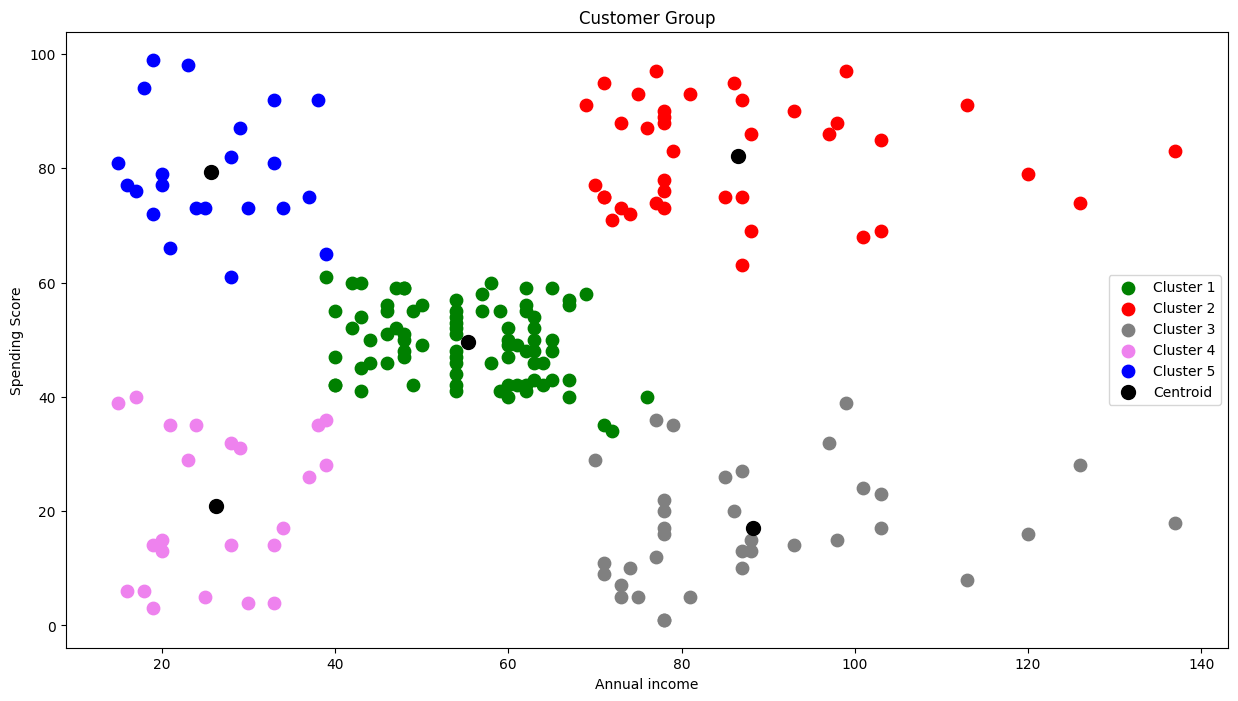

In [98]:
plt.figure(figsize=(15, 8))
plt.scatter(X.iloc[Y == 0, 0], X.iloc[Y == 0, 1], s=80, c='green', label='Cluster 1')
plt.scatter(X.iloc[Y == 1, 0], X.iloc[Y == 1, 1], s=80, c='red', label='Cluster 2')
plt.scatter(X.iloc[Y == 2, 0], X.iloc[Y == 2, 1], s=80, c='gray', label='Cluster 3')
plt.scatter(X.iloc[Y == 3, 0], X.iloc[Y == 3, 1], s=80, c='violet', label='Cluster 4')
plt.scatter(X.iloc[Y == 4, 0], X.iloc[Y == 4, 1], s=80, c='blue', label='Cluster 5')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroid')

plt.title('Customer Group')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()